In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
df = pd.read_csv("./perceptron_dataset.csv")
df.shape

(1000, 3)

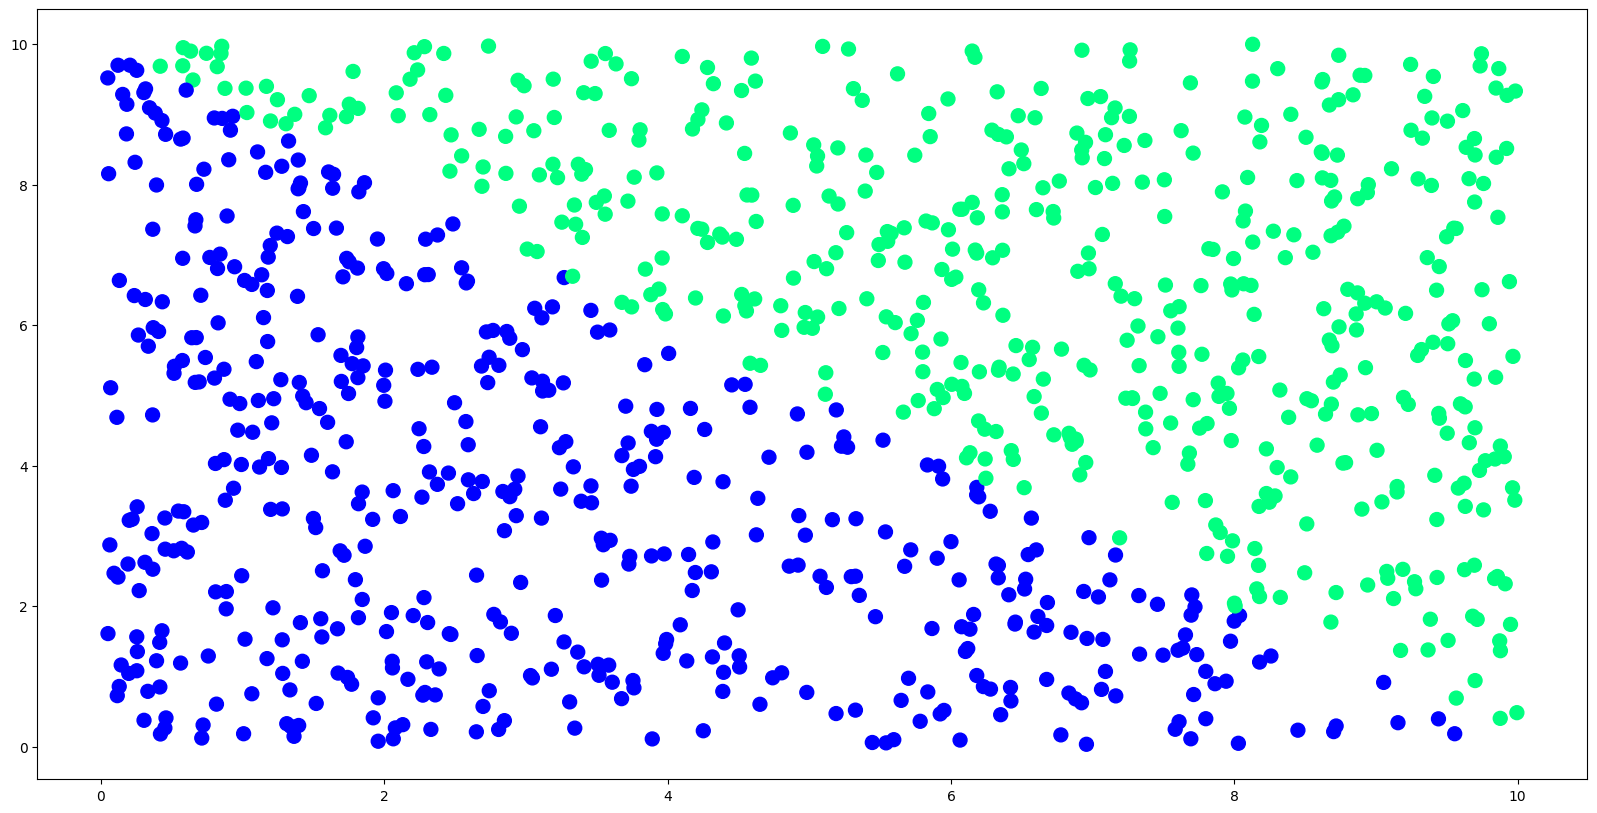

In [73]:
plt.figure(figsize=(20, 10))
plt.scatter(df['cgpa'], df["resume_score"], c=df["placed"], cmap="winter", s=100)

In [74]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [75]:
def step(z):
    return 1 if z > 0 else 0

In [76]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1) # Inserts 1 infront of every row of data
    # E.g.: [2,3] => [1,2,3]
    # [0.2, 3.1] => [1, 0.2, 3.1]
    weights = np.ones(X.shape[1]) # Generates initial weights of shape of X
    # E.g. weights [1,1,1] if X.shape = 3
    lr = 0.1 # Specifies the learning rate

    for i in range(1_000_000):
        # Choose a random number from 0 to 100
        # Because we have 100 data
        j = np.random.randint(0, 100) 

        # We are performing the dot product of the randomly
        # selected data and  the initial weights
        # E.g. Data = [1,4,5] and weights = [1,1,1]
        # Result = 1*1+4*1+5*1 = 10
        # Now we pass this 10 to the step function
        # This returns 1 if number > 0 else returns 0
        # So for this case y_hat = 1
        y_hat = step(np.dot(X[j], weights)) 

        # Now we are applying the formula 
        # Formula = wn = wo + lr *(actual_outcome - outcome predicted by model) 
        # * randomly selected data
        weights = weights + lr * (y[j] - y_hat) * X[j]
    
    # Returning the intercept(coordinates) and the coefficient values
    return weights[0], weights[1:]

In [77]:
intercept_, coef_ = perceptron(np.array(X),np.array(y))

In [78]:
# Calculating m because m = -(A/B)
m = -(coef_[0] / coef_[1])

# Calculating b because b = -(C/B)
b = -(intercept_ / coef_[1])

In [79]:
x_min = df['cgpa'].min() - 1
x_max = df['cgpa'].max() + 1
x_input = np.linspace(x_min, x_max, 500)
y_input = m*x_input + b


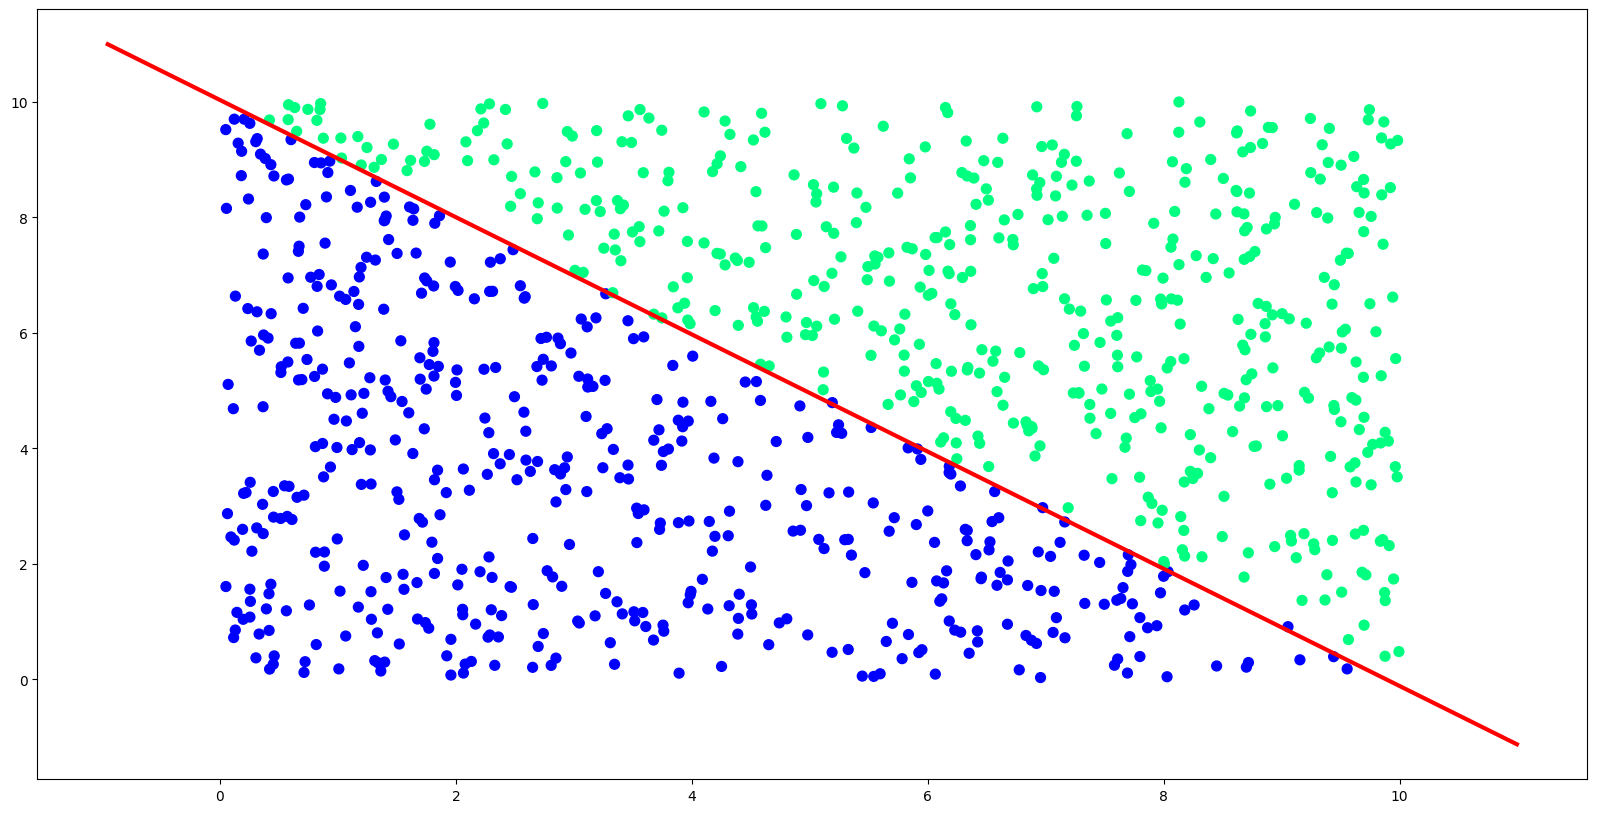

In [80]:
# Plotting the initial data and the line
plt.figure(figsize=(20,10))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.scatter(df["cgpa"], df["resume_score"], c=df["placed"], cmap="winter", s=50)